In [1]:
from envs.packingEnv import *

Initial Observation (sample):
Unpacked Boxes (first 3): [[20. 20. 30.]
 [25. 15. 25.]
 [18. 22. 28.]]
Container State (corner): [  0. 100. 100.   0.   0. 100. 100.]
Initial Info: {'max_packed_height': 0.0, 'num_packed_boxes': 0, 'num_unpacked_boxes': 5, 'total_packed_volume': 0, 'current_g': 0.0, 'steps_taken': 0}


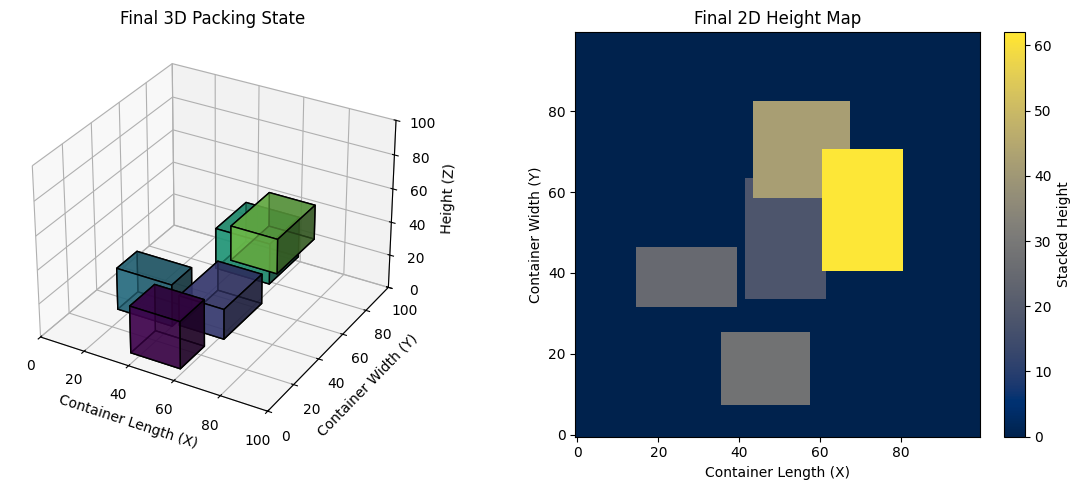

In [8]:
container_dims = (100, 100) 

boxes = [
    (20, 20, 30), (25, 15, 25), (18, 22, 28), (30, 18, 20), (24, 24, 24)
]
# To test GIF and human rendering:
env = PackingEnv(container_dims, boxes, max_boxes=50, render_mode=None, gif_path="./my_packing.gif")
# To test ANSI rendering only:
# env = PackingEnv(container_dims, boxes, max_boxes=10, render_mode='ansi')

obs, info = env.reset()
print("Initial Observation (sample):")
print("Unpacked Boxes (first 3):", obs["unpacked_boxes_state"][:3])
print("Container State (corner):", obs["container_state"][0,0,:])
print("Initial Info:", info)
if env.render_mode == 'human': env.render()


total_reward = 0.0
for step_num in range(len(boxes) + 5): # Allow a few extra steps
    action = env.action_space.sample() # Random action

    if env.unpacked_boxes: # If there are boxes to pack
        selected_idx = np.random.randint(0, len(env.unpacked_boxes))
        box_to_try = env.unpacked_boxes[selected_idx]
        
        best_action = None
        # Try a few random positions and orientations
        for _ in range(5): # Try 5 random configurations
            temp_pos = env.action_space["position"].sample()
            temp_orient = env.action_space["orientation"].sample()
            
            oriented_dims_test = env._get_oriented_dimensions(box_to_try, temp_orient)
            is_valid_footprint, _ = env._is_valid_placement(oriented_dims_test, temp_pos)
            if is_valid_footprint: # Basic check
                best_action = {"position": temp_pos, "box_select": selected_idx, "orientation": temp_orient}
                break
        if best_action:
            action = best_action
        else: # Fallback to fully random if no quick valid found
                action = {"position": env.action_space["position"].sample(), 
                        "box_select": selected_idx, 
                        "orientation": env.action_space["orientation"].sample()}
    else: # No boxes left
        break


    #print(f"\n--- Step {info.get('steps_taken', step_num +1)} ---")
    #print(f"Action: {action}")
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward


    #print(f"Reward: {reward:.3f}, Total Reward: {total_reward:.3f}")
    #print(f"Terminated: {terminated}, Truncated: {truncated}")
    #print("Info:", info)

    if terminated or truncated:
        #print("Episode finished.")
        break

env.display_final_state() # Show final plots
